In [1]:
from __future__ import  absolute_import, division, print_function, unicode_literals
!pip install tensorflow==2.0.0beta-1

In [2]:
#import and check version
import tensorflow as tf
import numpy as np
print(tf.__version__)
print(tf.keras.__version__)

2.0.0-beta1
2.2.4-tf


#Example 1:Linear Regression using tensorflow 2.0.0-beta1

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Hyperparameters Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [0]:
#load data  --- now taking random data but perform this with any csv data later------
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]


In [0]:
# Weight and Bias, initialized randomly.
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [0]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print(f"step: {step}, loss: {loss}, W: {W.numpy()}, b: { b.numpy()}")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
step: 50, loss: 0.2812540531158447, W: 0.5079066157341003, b: -1.018049716949463
step: 100, loss: 0.257885217666626, W: 0.4928067922592163, b: -0.9109988212585449
step: 150, loss: 0.2371891289949417, W: 0.4785967171192169, b: -0.8102554678916931
step: 200, loss: 0.21886013448238373, W: 0.46522387862205505, b: -0.7154481410980225
step: 250, loss: 0.2026272863149643, W: 0.4526389539241791, b: -0.6262267827987671
step: 300, loss: 0.1882510930299759, W: 0.44079554080963135, b: -0.5422623753547668
step: 350, loss: 0.1755191534757614, W: 0.42965003848075867, b: -0.46324560046195984
step: 400, loss: 0.16424334049224854, W: 0.4191611707210541, b: -0.38888442516326904
step: 450, loss: 0.154257133603096, W: 0.4092903435230255, b: -0.3189046084880829
step: 500, loss: 0.14541304111480713, W: 0.4000011086463928, b: -0.2530481815338135
step: 550, loss: 0.1375804990530014, W: 0.39125919342041016, b: -0.19107

final weight:0.3324691653251648 and bias:0.225722998380661


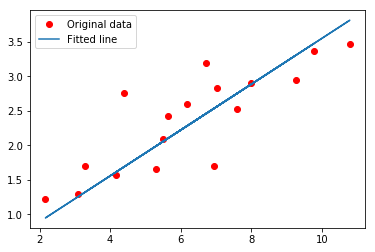

In [9]:
# Graphic display
tf.print(f"final weight:{W.numpy()} and bias:{b.numpy()}")
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')

plt.legend()
plt.show()

# Logistic Regression with tensorflow 2.0.0-beta1

Over MNIST dataset available in colab

In [0]:
# MNIST dataset parameters.
num_classes = 10 # 0 to 9 digits
image_vector_size = 784 # 28*28

# Training parameters.
learning_rate = 0.01
training_steps = 1000
batch_size = 156
display_step = 50

In [99]:
# Prepare MNIST data.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize images value as max value is 255
x_train, x_test = x_train / 255, x_test / 255

#checking shape for all and unique labels in target
x_train.shape, y_train.shape, x_test.shape, y_test.shape, np.unique(y_train)

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [100]:
#checking datatypes
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(dtype('float64'), dtype('uint8'), dtype('float64'), dtype('uint8'))

In [101]:
#coverting to float32 as random generated weight will be in float32
x_train, x_test = tf.cast(x_train, np.float32), tf.cast(x_test, np.float32)
x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype

(tf.float32, dtype('uint8'), tf.float32, dtype('uint8'))

Traing Set Sample Display:
 image no:36653   Label:6


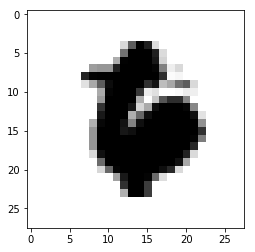

Test Set Sample Display:
 image no:1646   Label:1


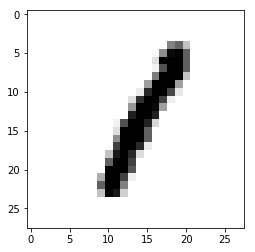

In [102]:
#display image from train set and test set
def display_image_label(featureset, labelset):
  img_no= np.random.randint(0, featureset.shape[0])
  img = featureset[img_no]
  label= labelset[img_no]
  print(f" image no:{img_no}   Label:{label}") # multiplying with 255 as we scaled with it
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()
  
print("Traing Set Sample Display:\n","="*50)
display_image_label(x_train, y_train)
print("Test Set Sample Display:\n","="*50)
display_image_label(x_test, y_test)

In [0]:
# Flatten images 
x_train=tf.reshape(x_train, [x_train.shape[0], image_vector_size])
x_test=tf.reshape(x_test, [x_test.shape[0], image_vector_size])

In [104]:
#checking shape for all and unique labels in target
x_train.shape,x_train.dtype, y_train.shape, x_test.shape, y_test.shape, np.unique(y_train)

(TensorShape([60000, 784]),
 tf.float32,
 (60000,),
 TensorShape([10000, 784]),
 (10000,),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Traing Set Sample Display:
 image no:11024  label is :4


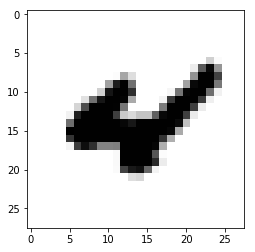

Test Set Sample Display:
 image no:9924  label is :9


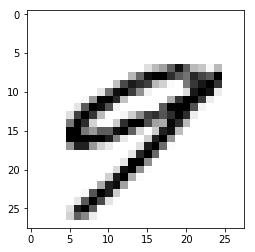

In [105]:
#test if reshaped well
def display_image_reshape_test(featureset, labelset):
  img_no= np.random.randint(0, featureset.shape[0])
  img = tf.reshape(featureset[img_no],[28,28])
  label= labelset[img_no]
  print(f" image no:{img_no}  label is :{label}") # multiplying with 255 as we scaled with it
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()
  
  
print("Traing Set Sample Display:\n","="*50)
display_image_reshape_test(x_train, y_train)
print("Test Set Sample Display:\n","="*50)
display_image_reshape_test(x_test, y_test)

In [0]:
# Use tf.data API to shuffle and batch data. can check --https://www.tensorflow.org/guide/data for description
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)


In [0]:
# Creating Weight Tensor of shape [784, 10]
W = tf.Variable(tf.ones([image_vector_size, num_classes]), name="weight")
# Creating Bias Tensor of shape [10], the total number of classes.
b = tf.Variable(tf.zeros([num_classes]), name="bias")

# Logistic regression softmax((Wx + b)), as multiclass classification
def logistic_regression(x):
    #Softmax
    return tf.nn.softmax(tf.matmul(x, W) + b)

# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # One hot Encoded label as vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Computing accuracy by using argmax on softmax probabilities
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# SGD Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)


In [0]:
# Optimization 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = logistic_regression(x)
        loss = cross_entropy(pred, y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

step: 50, loss: 56.62610626220703, accuracy: 0.9166666865348816
step: 100, loss: 33.428680419921875, accuracy: 0.942307710647583
step: 150, loss: 46.19032287597656, accuracy: 0.8974359035491943
step: 200, loss: 43.337188720703125, accuracy: 0.9166666865348816
step: 250, loss: 36.476253509521484, accuracy: 0.9294871687889099
step: 300, loss: 21.453079223632812, accuracy: 0.9487179517745972
step: 350, loss: 46.46192169189453, accuracy: 0.9230769276618958
step: 400, loss: 50.78899002075195, accuracy: 0.9358974099159241
step: 450, loss: 34.14408493041992, accuracy: 0.9358974099159241
step: 500, loss: 37.07732391357422, accuracy: 0.942307710647583
step: 550, loss: 37.0998420715332, accuracy: 0.9358974099159241
step: 600, loss: 36.55387878417969, accuracy: 0.9230769276618958
step: 650, loss: 31.13039207458496, accuracy: 0.9679487347602844
step: 700, loss: 25.150299072265625, accuracy: 0.942307710647583
step: 750, loss: 28.70367431640625, accuracy: 0.9487179517745972
step: 800, loss: 44.78013

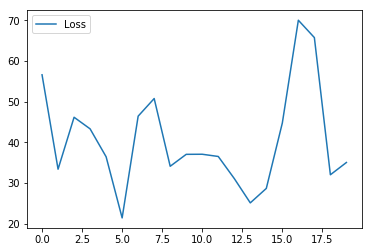

In [109]:
loss_list, accuracy_list = [], []
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = logistic_regression(batch_x)
        loss = cross_entropy(pred, batch_y)
        loss_list.append(loss)
        acc = accuracy(pred, batch_y)
        accuracy_list.append(acc)
        print(f"step: {step}, loss: {loss}, accuracy: {acc}")

plt.plot(loss_list, label="Loss")

plt.legend()
plt.show()

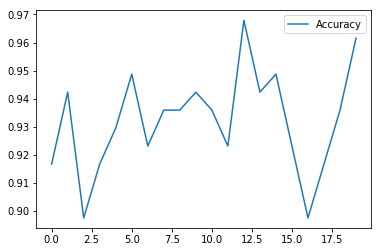

In [110]:
plt.plot(accuracy_list, label="Accuracy")
plt.legend()
plt.show()

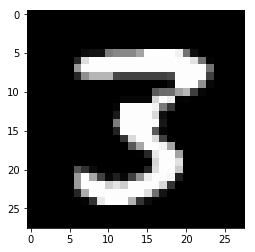

Image No. : 7119 , Predicted Label by Model :3, Actual Label: 3, Status: Congratulations! Predicted Correctly.


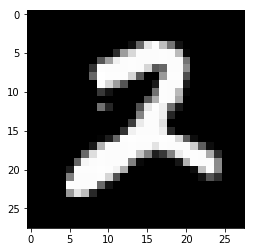

Image No. : 7120 , Predicted Label by Model :2, Actual Label: 2, Status: Congratulations! Predicted Correctly.


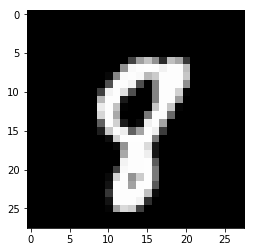

Image No. : 7121 , Predicted Label by Model :9, Actual Label: 8, Status: Opps! Wrong Prediction.


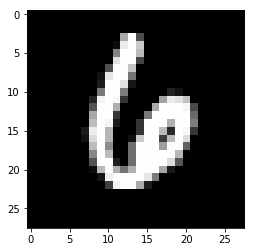

Image No. : 7122 , Predicted Label by Model :6, Actual Label: 6, Status: Congratulations! Predicted Correctly.


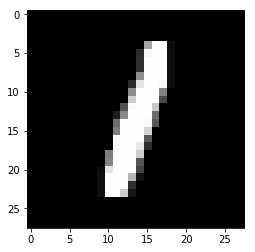

Image No. : 7123 , Predicted Label by Model :1, Actual Label: 1, Status: Congratulations! Predicted Correctly.


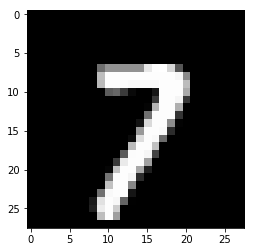

Image No. : 7124 , Predicted Label by Model :7, Actual Label: 7, Status: Congratulations! Predicted Correctly.


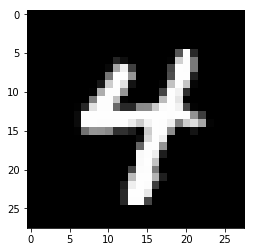

Image No. : 7125 , Predicted Label by Model :4, Actual Label: 4, Status: Congratulations! Predicted Correctly.


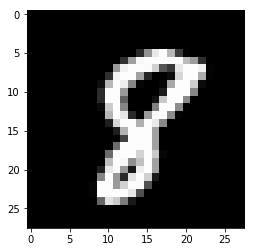

Image No. : 7126 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


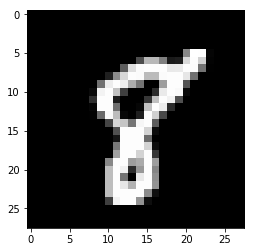

Image No. : 7127 , Predicted Label by Model :8, Actual Label: 8, Status: Congratulations! Predicted Correctly.


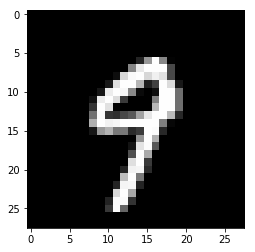

Image No. : 7128 , Predicted Label by Model :9, Actual Label: 9, Status: Congratulations! Predicted Correctly.
9 prediction out of 10


In [111]:


def random_validation_test(test_dataset, test_labelset):
  start_chunk = np.random.randint(0, test_dataset.shape[0])
  end_chunk = start_chunk+10
  images = test_dataset[start_chunk:end_chunk]
  predicted = logistic_regression(test_dataset[start_chunk:end_chunk])
  counter = 0;
  correct = 0;
  for img in range(start_chunk,end_chunk):
    plt.imshow(tf.reshape(test_dataset[img],[28,28]), cmap='gray')
    plt.show()
    pred = np.argmax(predicted.numpy()[counter])
    act_label = test_labelset[img]
    
    if pred == act_label:
      status = "Congratulations! Predicted Correctly."
      correct +=1
    else:
      status = "Opps! Wrong Prediction."
    print(f"Image No. : {img} , Predicted Label by Model :{pred}, Actual Label: {act_label}, Status: {status}")
    
    counter = counter+1;
  print(f"{correct} prediction out of {10}")  
  
random_validation_test(x_test, y_test)